# Algoritmia
## Práctica Opcional
### Curso 2023 - 2024
---
 

#### Autores:
* César Rodríguez Villagrá
* Marcos Gómez Vega

---
Resuelva la siguiente práctica.


**Recuerda**: 
* Solamente puedes utilizar librerías nativas (https://docs.python.org/es/3.8/library/index.html).
  * <sub><sup>_Importe las librerías que desees._</sup></sub>
* Se recomienda utilizar un entorno con la versión 3.8 (`conda create -n <nombre_entorno> python=3.8`). Más información en https://conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html.
* Las funciones que importes no son "gratis", cada una tendrá una complejidad temporal y espacial que se tendrá que tener en cuenta.
* Las funciones que crees, han de estar en una celda que comience por `#testeable` para que se importe en los test.

**Entrega**
* Poner el nombre del fichero como: `<apellidosPrimerAlumno>_<apellidosSegundoAlumno>_opcional.ipynb`.
    * <sub><sup>_En caso de que el fichero no tenga ese nombre, la entrega tendrá una penalización de **2 puntos**_></sup></sub>
* Verificar que la entrega no está corrupta.
    * <sub><sup>_En caso de que la entrega está corrupta, se evaluará con **0 puntos**_.</sup></sub>
* Ambos alumnos tendrán que hacer la entrega.
    * <sub><sup>_En caso de que uno no la haga se evaluará como **No presentado**, si las entregas son diferentes tendrá cada una una penalización de **2 puntos**_ y se corregirán por separado.</sup></sub>


No se puede importar de otros módulos no nativos.
La liberaría `networkx` solo se puede utilizar para visualizar de los árboles y de los grafos..

In [1]:
#testeable
# Importaciones
from itertools import combinations

### `Multiplicación Encadenada de Matrices`

In [2]:
#testeable
def multiplicacion_encadenada_matrices(dimensiones):
    """
    Dadas las dimensiones de varias matrices a multiplicar, aplica el método
    de programación dinámica para para determinar en qué orden realizar las
    multiplicaciones.
    El número de matrices será la longitud de dimensiones menos uno.
    Las dimensiones de la matriz M_i están en las componentes i-1 e i de
    'dimensiones'.
    Devuelve el número de multiplicaciones de elementos a realizar y una
    cadena con la fórmula, incluyendo paréntesis (solo si son necesarios), en
    la que se realizarían las multiplicaciones.
    Por ejemplo '(M_1*(M_2*M_3))*M_4'.
    """

    parentesis: list[list[int]] = [
        [0] * len(dimensiones) for _ in range(len(dimensiones))]

    n: int = len(dimensiones) - 1
    matriz: list[list[int]] = [[0]*len(dimensiones)
                               for _ in range(len(dimensiones))]

    for diag in range(1, n):
        for ini in range(1, n-diag + 1):
            for fin in range(ini, ini+diag):
                n_prod: int = matriz[ini][fin] + matriz[fin+1][ini+diag] + \
                    dimensiones[ini-1] * dimensiones[fin] * \
                    dimensiones[ini+diag]
                if fin == ini or n_prod < minimo:
                    minimo: int = n_prod
                    matriz[ini][ini+diag] = minimo
                    parentesis[ini][ini+diag] = fin

    def imprimir_parentesis_optimos(inicio: int, fin: int) -> str:
        if inicio == fin:
            return f"M_{inicio}"
        result = "("
        result += imprimir_parentesis_optimos(inicio, parentesis[inicio][fin])
        result += "*"
        result += imprimir_parentesis_optimos(parentesis[inicio][fin] + 1, fin)
        result += ")"
        return result
    texto: str = imprimir_parentesis_optimos(1, n)
    return matriz[1][n], texto[1:-1]

### Clase `ArbolBusquedaOptimo`

In [3]:
#testeable
class ArbolBusquedaOptimo:
    """
    Clase para árboles de búsquedas construidos a partir de las probabilidades
    de búsqueda de sus claves y pseudoclaves.
    Las pseudoclaves representan las búsquedas de elementos que no están en el
    árbol.

    claves = ["k1", "k2", "k3", "k4", "k5"]
    arbol = ArbolBusquedaOptimo(claves,[0.15, 0.10, 0.05, 0.10, 0.20],[0.05, 0.10, 0.05, 0.05, 0.05, 0.10])
    """
    
    def __init__(self, claves, probab_claves, probab_pseudo = None):
        """
        Constructor a partir de una secuencia con las claves, sus probabilidades 
        y las probabilidades de buscar elementos que no están.
        La longitud de claves y probab_claves tiene que ser la misma.
        Si probab_pseudo es None no se tienen en cuentas las búsquedas de 
        elementos que no están.
        Si prabab_pseudo no es None, su longitud debe ser la de claves más 1.
        """

        if len(claves) != len(probab_claves):
            raise ValueError(
                "Los tamños de claves y su probabilidad no son iguales")

        self.claves: list = claves
        self.probab_claves: list[float] = probab_claves

        if probab_pseudo is None:
            self.probab_pseudo: list[float] = [0.0]*(len(claves)+1)
        else:
            if len(probab_pseudo) != len(claves) + 1:
                raise ValueError(
                    "Los tamaños de claves +1 y su probabilidad no son iguales")
            self.probab_pseudo = probab_pseudo

        self.matrizcosteEsperado,self.matrizRaiz=self.algoritmoCostoMinimo()
       
        indiceRaiz: int=self.matrizRaiz[1][len(self.claves)]
        self.raizInicial=self.claves[indiceRaiz-1]

        self.arbolBinarioConHijos={}
        self.crear_arbol(self.matrizRaiz[1:], self.claves, 0, len(self.claves), -1, False)
        
    def algoritmoCostoMinimo(self):
        n: int = len(self.claves)+1
        p: list[float] = [0.0] + self.probab_claves
        q: list[float] = self.probab_pseudo

        e: list[list[float]] = [[0.00] * (n) for _ in range(n + 1)]
        raiz: list[list[int]] = [[0] * (n) for _ in range(n)]
        w: list[list[float]] = [[0.00] * (n) for _ in range(n+1)]

        for i in range(1, n + 1):
            e[i][i - 1] = q[i - 1]
            w[i][i - 1] = q[i - 1]

        for l in range(1, n):
            for i in range(1, n - l + 1):
                j = i + l - 1
                e[i][j] = float('inf')
                w[i][j] = w[i][j - 1] + p[j] + q[j]
                w[i][j] = round(w[i][j], 2)
                j: int = j+1
                for r in range(i, j):
                    t: float = e[i][r - 1] + e[r + 1][j-1] + w[i][j-1]
                    if t < e[i][j-1]:
                        e[i][j-1] = t
                        e[i][j-1] = round(e[i][j-1], 2)
                        raiz[i][j-1] = r

        return e, raiz
    
    def crear_arbol(self,raiz, key, i, j, padre, is_left):
           
        if i > j or i < 0 or j > len(raiz) or i>len(raiz)-1  :
            return 0
        node = raiz[i][j]
        if node == 0:
            return 0

        if padre == -1:  
            self.arbolBinarioConHijos[key[node-1]]=[None,None]
        elif is_left:
            
            self.arbolBinarioConHijos[padre][0]=key[node-1]
            if key[node-1] not in self.arbolBinarioConHijos:
                self.arbolBinarioConHijos[key[node-1]]=[None,None]
        else:
            self.arbolBinarioConHijos[padre][1]=key[node-1]
            if key[node-1] not in self.arbolBinarioConHijos:
                self.arbolBinarioConHijos[key[node-1]]=[None,None]

        self.crear_arbol(raiz, key, i, node - 1, key[node-1], True)
        self.crear_arbol(raiz, key, node , j, key[node-1], False)

        return 

    def __str__(self, clave=None):
        """
        Devuelve una cadena con una representación del árbol.
        Si clave es distinto de None se obtiene la cadena para el subárbol con
        clave como raíz.
        La cadena correspondiente a un nodo con dos hijos es 
        "(" + str(subarbol_izq) + str(clave) + str(subarbol_der) + ")".
        Para un subárbol vacío la cadena correspondiente es vacía.
        Por ejemplo, un nodo hoja se representa como "(" + str(clave) + ")".
        """

        def arbol_a_texto(clave) -> str:

            if clave is None or clave not in self.arbolBinarioConHijos:
                return ""

            nodo = self.arbolBinarioConHijos[clave]
            subarbol_izq: str = arbol_a_texto(nodo[0])
            subarbol_der: str = arbol_a_texto(nodo[1])

            if subarbol_izq == "" and subarbol_der == "":
                return "(" + str(clave) + ")"
            else:
                return "(" + subarbol_izq + str(clave) + subarbol_der + ")"

        if clave is None:
            clave = self.raiz()

        return arbol_a_texto(clave)

    def __len__(self):
        """Número de claves en el árbol."""
        
        return len(self.claves)
        
    def __contains__(self, clave):
        """Indica si una clave está en el árbol."""
        
        if clave in self.claves:
            return True
        else:
            return False
    
    def __getitem__(self, i):
        """Devuelve la clave i-ésima."""
        
        return self.claves[i]

    def raiz(self):
        """Devuelve la clave de la raíz del árbol.""" 
        
        return self.raizInicial
    
    def comprobar_hijos_con_clave(self,hijoDerecha, hijoIzquierdo, clave):
        if hijoIzquierdo == clave or hijoDerecha == clave:
            return True
        else:
            return False

    def profundidad(self, clave=None):
        """
        Devuelve la profundidad del árbol si clave es None, si no devuelve la 
        profundidad de la clave. 
        Si la clave no está devuelve None.
        """
 
        def mirarHijos(hijoIzquierdo, hijoDerecha, clave, valor):

            if self.comprobar_hijos_con_clave(hijoDerecha, hijoIzquierdo, clave):
                return valor
            if hijoIzquierdo != None and hijoDerecha != None:
                return max(mirarHijos(*self.hijos(hijoDerecha), clave, valor+1), mirarHijos(*self.hijos(hijoIzquierdo), clave, valor+1))
            elif hijoDerecha != None:
                return mirarHijos(*self.hijos(hijoDerecha), clave, valor+1)
            elif hijoIzquierdo != None:
                return mirarHijos(*self.hijos(hijoIzquierdo), clave, valor+1)
            else:
                return -1

        valor = 1

        if clave is None:
            max_profundidad = 0
            for key in self.claves:
                profundidad: int = self.profundidad(key)
                if profundidad > max_profundidad:
                    max_profundidad: int = profundidad
            return max_profundidad

        if clave not in self.claves:
            return None

        if clave == self.raiz():
            return 0

        hijoIzquierdo, hijoDerecho = self.hijos(self.raiz())

        valor = mirarHijos(hijoIzquierdo, hijoDerecho, clave, valor)

        return valor
   
    def hijos(self, clave=None):
        """
        Devuelve un par con las claves del hijo izquierdo y derecho.
        Si el argumento clave es None devuelve los hijos de la raíz.
        En el resultado, None indica que no tiene ese hijo.
        """
        if clave is None:
            clave = self.raiz()

        if clave in self.arbolBinarioConHijos:
            hijoIzquierdo, hijoDerecho = self.arbolBinarioConHijos[clave]
        return (hijoIzquierdo, hijoDerecho)
            
    def coste_esperado(self, clave=None):
        """
        Devuelve el coste esperado de la búsqueda en el subárbol asociado a una
        clave.
        Si clave es None devuelve el coste del árbol completo.
        """

        if clave == None or clave == self.raiz():
            return self.matrizcosteEsperado[1][len(self.claves)]

        izq, der = self.hijos(clave)

        indice: int = self.claves.index(clave)+1
        if izq is None and der is None:
            return self.matrizcosteEsperado[indice][indice]

        if izq is not None:
            while self.hijos(izq)[0] is not None:
                izq = self.hijos(izq)[0]
            indiceIzq: int = self.claves.index(izq)+1
        else:
            indiceIzq: int = indice
        if der is not None:
            while self.hijos(der)[1] is not None:
                der = self.hijos(der)[1]
            indiceDer: int = self.claves.index(der)+1
        else:
            indiceDer: int = indice

        return self.matrizcosteEsperado[indiceIzq][indiceDer]
    
    def dibuja(self):
        """Dibujo del árbol."""
        
        grafo = nx.Graph()
        if self.__len__() is None:
            return
        for c in self:
            grafo.add_node(c)
        for c in self:
            izq, der = self.hijos(c)
            for hijo in (izq, der):
                if hijo is not None:
                    grafo.add_edge(c, hijo)
        pos = {c: (i, -self.profundidad(c)) for i, c in enumerate(self)}
        nx.draw(grafo, with_labels = True, pos = pos)
        plt.show()

#### Dibujo de los árboles

In [4]:
import matplotlib.pyplot as plt
import networkx as nx

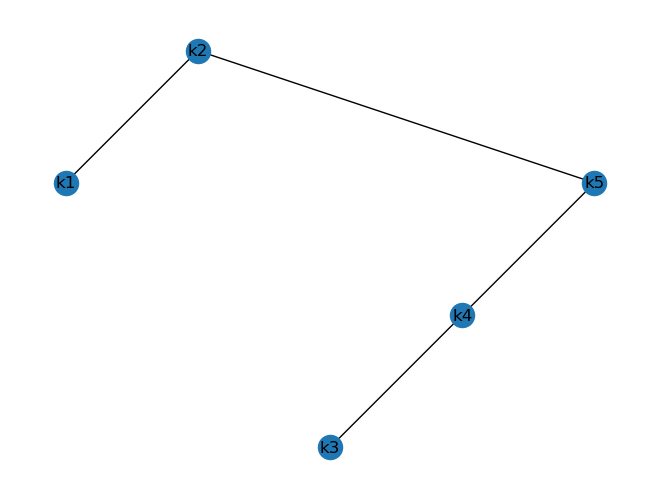

In [5]:
arbol = ArbolBusquedaOptimo(
    ["k1", "k2", "k3", "k4", "k5"], 
    [0.15, 0.10, 0.05, 0.10, 0.20], 
    [0.05, 0.10, 0.05, 0.05, 0.05, 0.10])

arbol.dibuja()

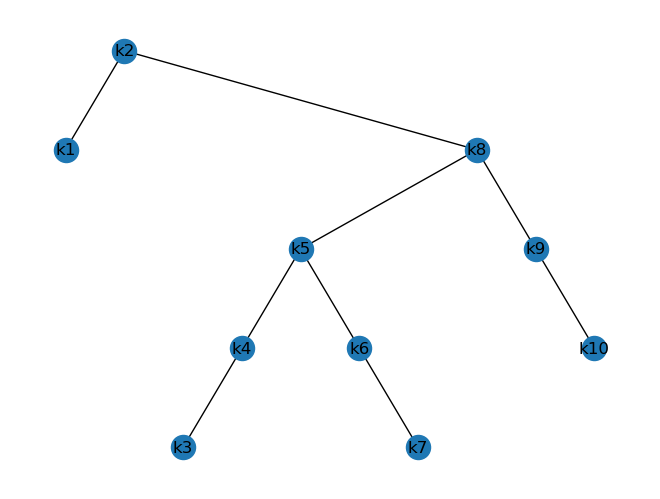

In [6]:
arbol = ArbolBusquedaOptimo(
    ["k" + str(i) for i in range(1, 11)], 
    [0.21, 0.2, 0.04, 0.06, 0.08, 0.04, 0.04, 0.11, 0.19, 0.03])   

arbol.dibuja()

### Clase `FormaNormalConjuntiva`

In [7]:
#testeable

class FormaNormalConjuntiva:
    """
    Clase que representa una expresión en forma normal conjuntiva.
    Las cláusulas son secuencias con dos elementos, el primero contiene las
    variables que están sin negar, el segundo las que están negadas.
    """

    def __init__(self, *clausulas):
        """Constructor. Si se reciben cláusulas se añaden a la expresión."""
        self.expresion: list[list] = []  # entre cada lista que contiene habría un AND, y entre cada elemento de cada lista contenida un OR
        self.variables = set()
        if len(clausulas) > 0:
            self.inserta_clausulas(*clausulas)


    def num_variables(self):
        """Devuelve el número de variables que aparecen en la expresión."""
        return len(self.variables)

    def __len__(self):
        """Devuelve el número de clausulas."""
        return len(self.expresion)

    def inserta_clausulas(self, *clausulas):
        """Inserta cláusulas adicionales al final de la expresión."""
        for sin, neg in clausulas:
            self.expresion.append(([*sin],[*neg]))
            for var in sin:
                self.variables.add(var)
            for var in neg:
                self.variables.add(var)
            
    def __getitem__(self, i):
        """Devuelve la cláusula i-ésima. Para la primera, i=0."""
        return self.expresion[i]
        
    def evalua(self, ciertas):
        """
        Evalua la expresión, es decir, devuelve True o False, dada una
        asignación de valores a las variables. La asignación se indica con el
        iterable "ciertas" en el que están las variables que están a cierto.
        El resto de variables se entiende que están a falso.
        """
        positivas = set(ciertas)
        for pos, neg in self.expresion:
            for var in pos:
                if var in positivas:
                    break
            else:
                for var in neg:
                    if not (var in positivas):
                        break
                else:
                    return False

        return True

    def asignacion_satisfacible(self):       
        """
        Si la expresión es satisfacible, devuelve una asignación que hace
        la expresión cierta. La asignación se indica como un iterable de las
        variables que están a cierto, el resto de variables estarán a falso.
        Si la expresión no es satisfacible devuelve None.
        """
        vars: set = self.variables
        for num in range(len(vars)+1):
            for varCiertas in combinations(vars, num):
                if self.evalua(varCiertas) == True:
                    return varCiertas
        return None

### Casos de ejemplo

In [8]:
import unittest

In [9]:
class TestMultiplicacionMatricesEncadenadas(unittest.TestCase):

    def test_orden_multiplicacion_matrices(self):
        self.assertEqual(multiplicacion_encadenada_matrices([13, 5, 89, 3, 34]),
                (2856, "(M_1*(M_2*M_3))*M_4"))
        
class TestArbolBusquedaOptimo(unittest.TestCase):
    def test_arbol_busqueda(self):
        
        claves = ["k1", "k2", "k3", "k4", "k5"]
        arbol = ArbolBusquedaOptimo(
            claves, [0.15, 0.10, 0.05, 0.10, 0.20], 
            [0.05, 0.10, 0.05, 0.05, 0.05, 0.10])
       
        self.assertEqual(len(arbol), 5)
                              
        for clave in claves:
            self.assertTrue(clave in arbol)
        self.assertTrue("k0" not in arbol)
        self.assertTrue("k6" not in arbol)
        
        for i, clave in enumerate(claves):
            self.assertEqual(arbol[i], clave)
        
        for i, clave in enumerate(arbol):
            self.assertEqual(claves[i], clave)
            
        self.assertEqual(arbol.raiz(), "k2")
        
        self.assertEqual(arbol.profundidad(), 3)
        profundidades = [1, 0, 3, 2, 1]
        for clave, profundidad in zip(claves, profundidades):
            self.assertEqual(arbol.profundidad(clave), profundidad)
            
        lista_hijos = [(None, None), ("k1", "k5"), (None, None), ("k3", None), 
                 ("k4", None)]
        for clave, hijos in zip(claves, lista_hijos):
            self.assertEqual(arbol.hijos(clave), hijos)
            
        self.assertEqual(round(arbol.coste_esperado(), 2), 2.75)
        costes = [ 0.45, 2.75, 0.25, 0.60, 1.30]
        for clave, coste in zip(claves, costes):
            self.assertEqual(round(arbol.coste_esperado(clave), 2), coste)
            
        self.assertEqual(str(arbol), "((k1)k2(((k3)k4)k5))")

class TestFormaNormalConjuntiva(unittest.TestCase):
    
    def test_forma_normal_conjuntiva(self):
    
        fnc = FormaNormalConjuntiva()
        self.assertEqual(fnc.num_variables(), 0)
        self.assertEqual(len(fnc), 0)
    
        fnc.inserta_clausulas([["x_1", "x_4"], ["x_3"]])
        self.assertEqual(fnc.num_variables(), 3)
        self.assertEqual(len(fnc), 1)
    
        fnc.inserta_clausulas([["x_3"], ["x_2", "x_4"]])
        self.assertEqual(fnc.num_variables(), 4)
        self.assertEqual(len(fnc), 2)
    
        self.assertTrue(fnc.evalua([]))
        self.assertTrue(fnc.evalua(("x_1", "x_2", "x_3", "x_4")))
        self.assertFalse(fnc.evalua(("x_3",)))
        self.assertFalse(fnc.evalua(("x_2", "x_4")))
    
        asignacion = fnc.asignacion_satisfacible()
        self.assertIsNotNone(asignacion)
        self.assertTrue(fnc.evalua(asignacion))

In [10]:
if __name__ == "__main__":
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

...
----------------------------------------------------------------------
Ran 3 tests in 0.010s

OK


##### **Tests**

Para probar que tu solución pasa los tests. Utilice el comando:

```bash
$ python tests-py3<version de python> <mi notebook>
```

---

### Informe
Contesta a las siguientes preguntas.

#### **Complejidad**
1. Método `multiplicacion_encadenada_matrices`
    * **Complejidad temporal**: O(n^3) donde n es el número de matrices
    * **Complejidad espacial**: O(n^2) donde n es el número de matrices
2. Método `ArbolBusquedaOptimo.__init__`
    * **Complejidad temporal**: O(n^3) donde n es el numero de numero de claves y depende de la funcion algoritmoCostoMinimo 
    * **Complejidad espacial**: O(n^2) donde n es el número de claves del árbol
3. Método `FormaNormalConjuntiva.asignacion_satisfacible`
    * **Complejidad temporal**: Como asignacion_satisfacible depende de la función evalua que tiene una complejidad de O(n) donde n es el número de elementos de la forma normal conjuntiva, por lo que la complejidad de asignacion_satisfacible es O(n*2^k), donde n es el número de elementos y k es la cantidad de variables distintas que hay
